In [1]:
import numpy as np
import geopandas as gpd
from IPython.display import display
from shapely.geometry import Polygon
from utils import process_and_save_data
from model import EnhancedLandUsePredictionModel
from views import create_band_viewer, create_classification_viewer, create_spectral_indices_viewer, create_map_with_slider, analyze_time_series, plot_time_series, create_prediction_map_with_slider, create_prediction_viewer, visualize_predictions, ModelAnalysis


In [2]:
roi_coords = [
    [75.58679011123377, 26.725580815770467],
    [76.00152399795252, 26.725580815770467],
    [76.00152399795252, 27.08929110630265],
    [75.58679011123377, 27.08929110630265],
    [75.58679011123377, 26.725580815770467]
]

roi_polygon = Polygon(roi_coords)
roi_gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[roi_polygon])



d:\Code\Python\CE712 Project - Integrating AI with Remote Sensing for Predictive Land Use Change Models\views.py:748: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


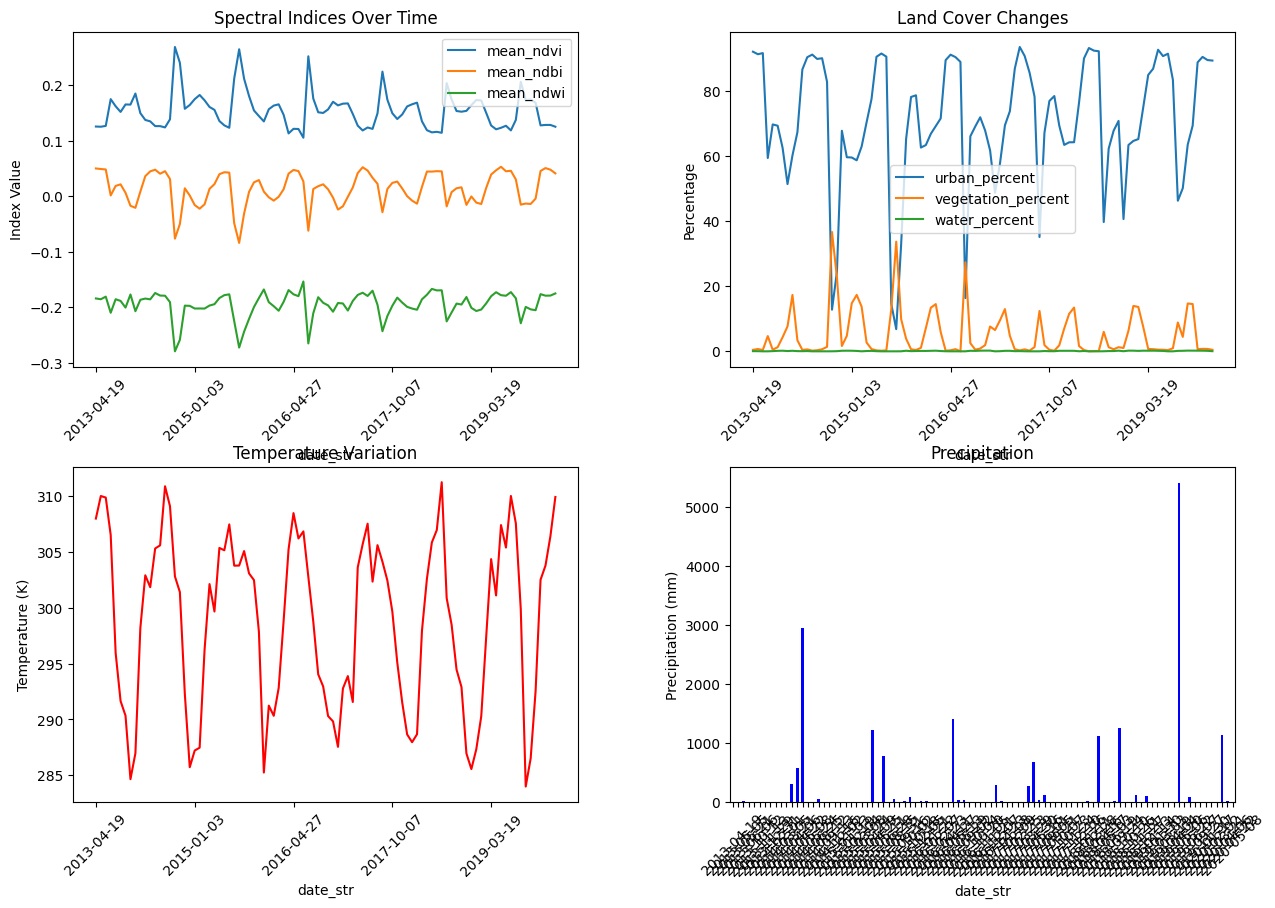

In [3]:
# Define file paths
data_dir = 'DataSet'
processed_dir = 'Processed_DataSet'
bounds = [[26.725580815770467, 75.58679011123377], 
         [27.08929110630265, 76.00152399795252]]

# Analyze time series
results = analyze_time_series(data_dir)

# Plot the time series results
plot_time_series(results)


In [4]:
all_processed_data = process_and_save_data(data_dir, processed_dir)


Loading pre-processed data...


In [ ]:
band_viewer = create_band_viewer('DataSet')
display(band_viewer)


In [ ]:
spectral_viewer = create_spectral_indices_viewer(all_processed_data)
display(spectral_viewer)


In [ ]:
classification_viewer = create_classification_viewer(all_processed_data)
display(classification_viewer)


In [8]:
Map = create_map_with_slider(all_processed_data, bounds, roi_gdf)
Map


Map(center=[26.907436, 75.794157], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sear…

In [9]:
'''
model = EnhancedLandUsePredictionModel(
        spatial_smoothing=1.0,
        window_size=3,
        n_estimators=50
    )

model.fit(all_processed_data, verbose=True, batch_size=10)

model.save_model('land_use_model.joblib')
'''


"\nmodel = EnhancedLandUsePredictionModel(\n        spatial_smoothing=1.0,\n        window_size=3,\n        n_estimators=50\n    )\n\nmodel.fit(all_processed_data, verbose=True, batch_size=10)\n\nmodel.save_model('land_use_model.joblib')\n"

In [10]:
model = EnhancedLandUsePredictionModel.load_model('land_use_model.joblib')


Model loaded from: land_use_model.joblib


In [11]:
predictions = model.predict_future(
        historical_window=all_processed_data[-24:],
        steps=3,
        verbose=True
    )

Processing historical data...

Generating 3 future predictions...

Generating prediction for step 1/3
Feature matrix shape: (2080540, 15)
Generated prediction for 2020-06-07
Unique predicted classes: [0 1 2 3]
Mean confidence: 1.000

Generating prediction for step 2/3
Feature matrix shape: (2080540, 15)
Generated prediction for 2020-07-07
Unique predicted classes: [0 1 2 3]
Mean confidence: 0.999

Generating prediction for step 3/3
Feature matrix shape: (2080540, 15)
Generated prediction for 2020-08-06
Unique predicted classes: [0 1 2 3]
Mean confidence: 0.999


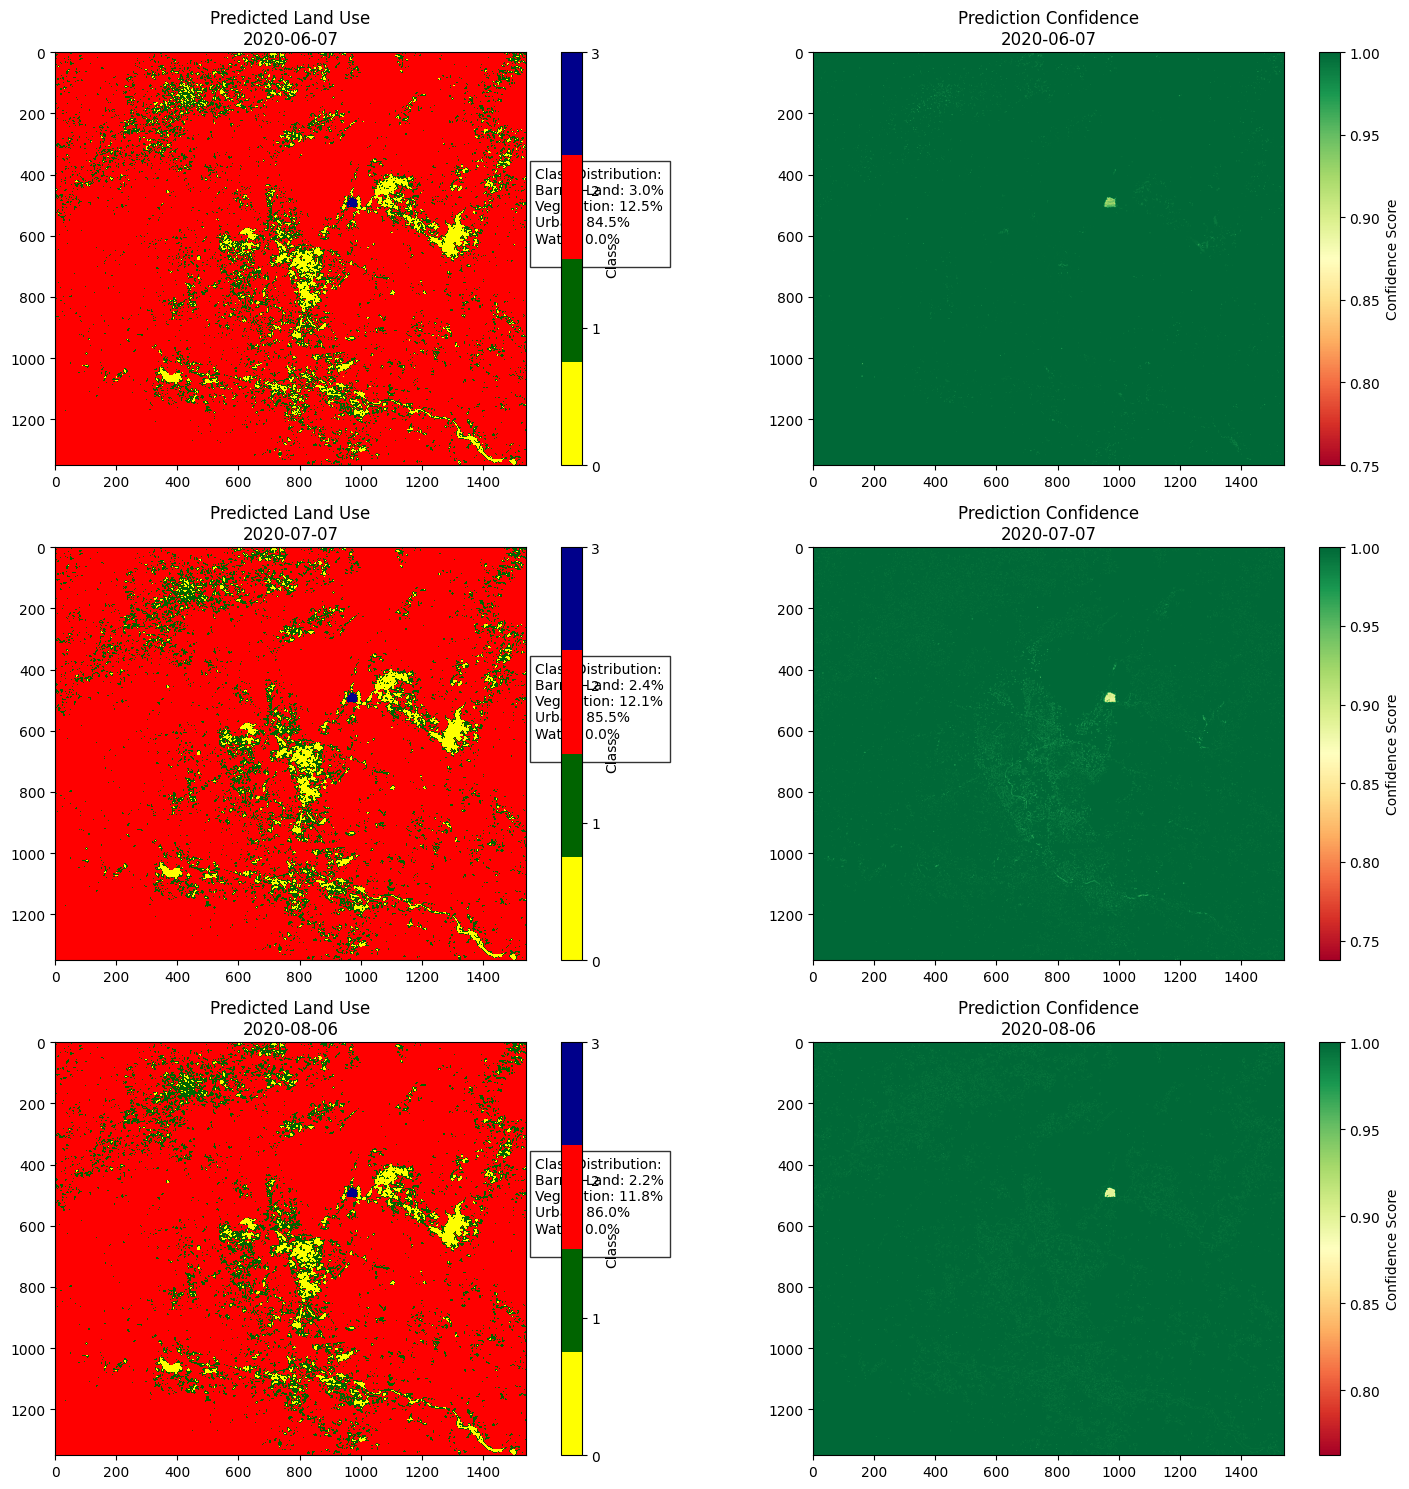

In [12]:
model.plot_prediction_results(predictions)

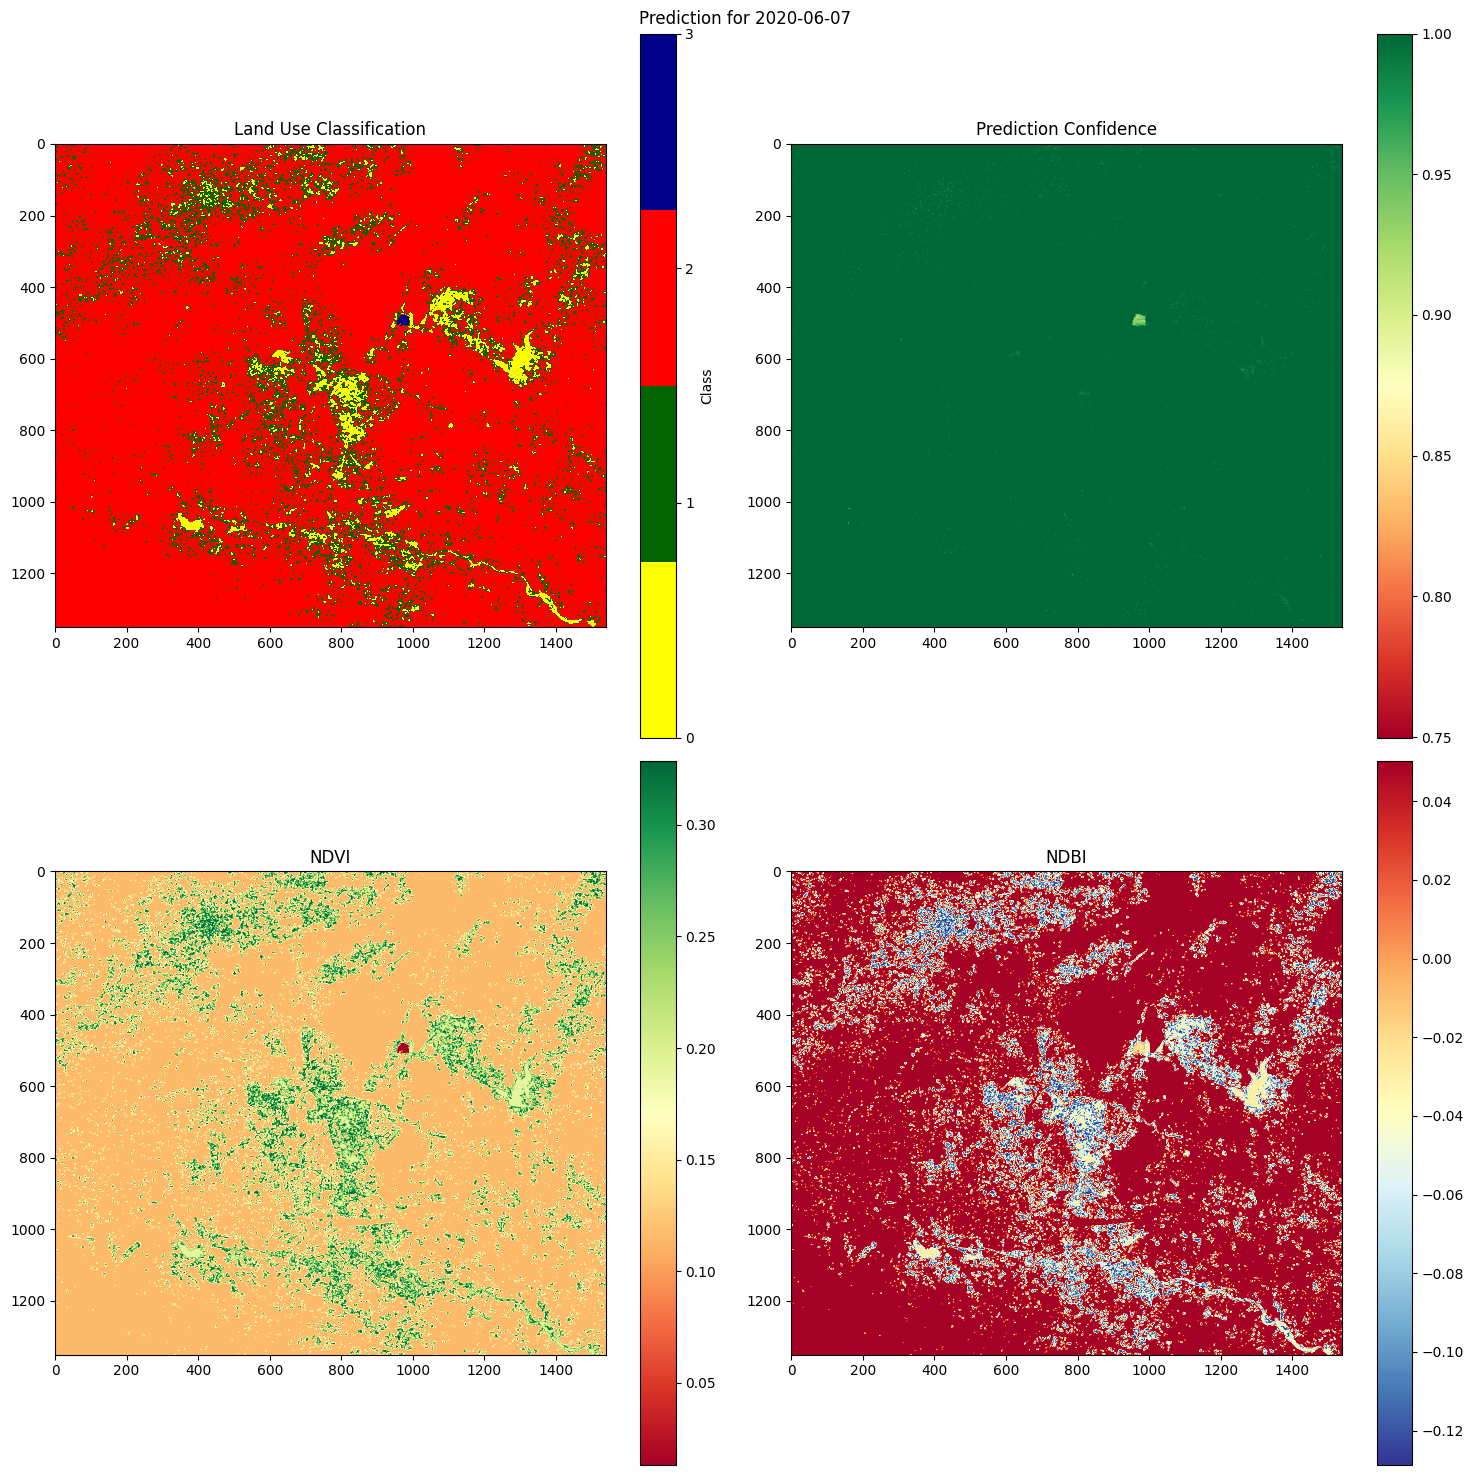

In [13]:
model.plot_prediction(predictions[0])

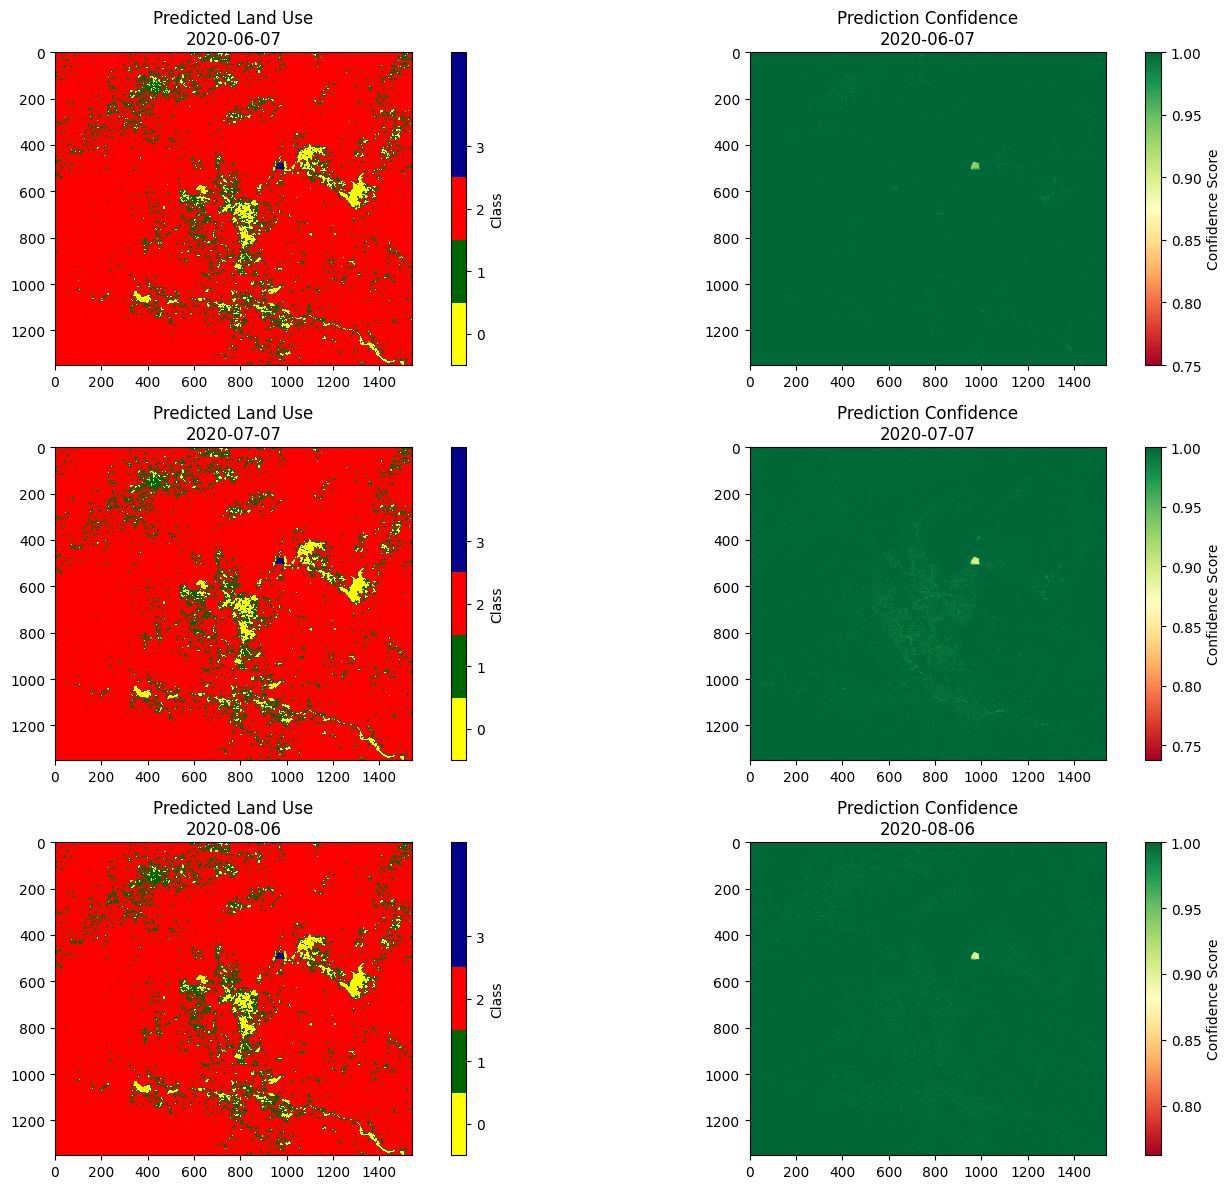

In [14]:
visualize_predictions(predictions)

In [15]:
for pred in predictions:
    print(f"\nPrediction for {pred['date_str']}:")
    unique, counts = np.unique(pred['classification'], return_counts=True)
    for cls, count in zip(unique, counts):
        print(f"Class {cls} ({model.class_mapping[cls]}): {count} pixels")
    print(f"Mean confidence: {np.mean(pred['confidence']):.3f}")


Prediction for 2020-06-07:
Class 0 (Barren Land): 61625 pixels
Class 1 (Vegetation): 260889 pixels
Class 2 (Urban): 1757244 pixels
Class 3 (Water): 782 pixels
Mean confidence: 1.000

Prediction for 2020-07-07:
Class 0 (Barren Land): 49327 pixels
Class 1 (Vegetation): 251095 pixels
Class 2 (Urban): 1779355 pixels
Class 3 (Water): 763 pixels
Mean confidence: 0.999

Prediction for 2020-08-06:
Class 0 (Barren Land): 44737 pixels
Class 1 (Vegetation): 246228 pixels
Class 2 (Urban): 1788817 pixels
Class 3 (Water): 758 pixels
Mean confidence: 0.999


In [16]:
analyzer = ModelAnalysis()

In [17]:
print("\nAnalyzing class distribution...")
class_dist = analyzer.analyze_class_distribution(predictions)
print(class_dist)
        
print("\nAnalyzing prediction confidence...")
confidence_analysis = analyzer.analyze_confidence(predictions)
print(confidence_analysis)
        
print("\nAnalyzing spatial changes...")
spatial_changes = analyzer.analyze_spatial_changes(predictions)
print(spatial_changes)


Analyzing class distribution...
         date  total_pixels  class_0_percent  class_1_percent  \
0  2020-06-07       2080540         2.961971        12.539485   
1  2020-07-07       2080540         2.370875        12.068742   
2  2020-08-06       2080540         2.150259        11.834812   

   class_2_percent  class_3_percent  
0        84.460957         0.037586  
1        85.523710         0.036673  
2        85.978496         0.036433  

Analyzing prediction confidence...
         date  mean_confidence  min_confidence  max_confidence  std_confidence
0  2020-06-07         0.999809        0.749837             1.0        0.002570
1  2020-07-07         0.999041        0.737492             1.0        0.005285
2  2020-08-06         0.999335        0.762500             1.0        0.003619

Analyzing spatial changes...
    from_date     to_date  change_percentage  pixels_changed  total_pixels
0  2020-06-07  2020-07-07           2.517375           52375       2080540
1  2020-07-07  2020-08

In [18]:
total_data = all_processed_data + predictions

In [19]:
P_map = create_prediction_map_with_slider(total_data, bounds, roi_gdf)
P_map

Map(center=[26.907436, 75.794157], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Sear…

In [20]:
P_view = create_prediction_viewer(total_data)
display(P_view)